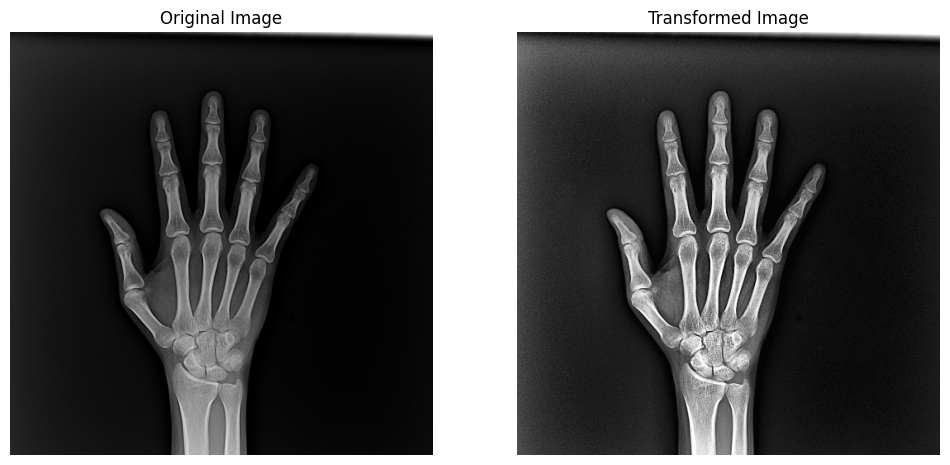

In [29]:
import cv2
from matplotlib import pyplot as plt
import albumentations as A

# 전처리 파이프라인 정의
tf_1 = A.Compose([
    A.Resize(512, 512),
    A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=1.0),
    # A.CenterCrop(450, 512),
    # A.Crop(x_min=0,y_min=30,x_max=512,y_max=512)
    A.ColorJitter(0.2, 0.5, 0.2, 0),
    A.Rotate(45,p = 0.5)
])
# image_path = '/data/ephemeral/home/level2-cv-semanticsegmentation-cv-10/data/test/DCM/ID200/image1663035116382.png'
image_path = '/data/ephemeral/home/level2-cv-semanticsegmentation-cv-10/data/test/DCM/ID040/image1661319116107.png'
# 이미지 로드 (여기서는 'image_path'를 해당 이미지 경로로 교체해야 함)
image = cv2.imread(image_path) # 'image_path'를 실제 이미지 파일 경로로 변경
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # OpenCV는 BGR로 이미지를 로드하기 때문에 RGB로 변환

# 전처리 파이프라인 적용
transformed = tf_1(image=image)
transformed_image = transformed["image"]

# 원본 이미지와 전처리된 이미지 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(transformed_image)
plt.axis('off')

plt.show()
